# Tarea 1

In [205]:
from sympy import *
from sympy import Indexed
init_printing(use_unicode=True)
import numpy as np
import matplotlib.pyplot as plt
import math

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

Dada la función de costos J
$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \hat{y}^{(i)}(x^{(i)}))^2 = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$

In [227]:
#Asignamos los nombres de la función y las variables, y les damos forma rebonita
B0=sympy.Symbol("B0")
B1=sympy.Symbol("B1")
x=sympy.Symbol("x")
y=sympy.Symbol("y")
m=sympy.Symbol("m")
i=sympy.Symbol("i")

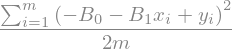

In [228]:
#Definimos la función de costos J
J=(1/(2*m))*sympy.Sum((Indexed(y,i)-B0-B1*Indexed(x,i))**2,(i,1,m))
J

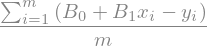

In [229]:
#Derivamos y simplificamos el resultado respecto a B0
DJ0=simplify(sympy.diff(J,B0))
DJ0

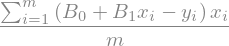

In [230]:
#Derivamos y simplificamos el resultado respecto a B1
DJ1=simplify(sympy.diff(J,B1))
DJ1

In [248]:
print("QED")

QED


## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [106]:
edad = np.loadtxt('data/edad.dat')
altura = np.loadtxt('data/altura.dat')

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [122]:
%cat data/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


In [231]:
#Definimos la clase Regresión lineal con ayuda del profe :)
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m

In [232]:
#Cargamos los datos desde el archivo chirps.txt
CT=np.loadtxt('data/chirps.txt')
#Separamos los datos en dos arrays, uno de chirps y otro de temperatura
chirps=CT.transpose()[0]
temp=CT.transpose()[1]

In [233]:
#Aplicamos la regresión lineal a los datos
r = RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
r.gradientDescent(chirps, temp)

La función convergió con beta: [22.26350136  3.44531603] en la iteración 123659


Esto significa que tenemos una recta con pendiente 3.44 y ordenada al origen de 22.26 aproximadamente

In [234]:
#Definimos la función graficadora
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]


    plt.scatter(x,y, label="datos")
    plt.plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    plt.xlabel('Chirps/sec')
    plt.ylabel('Temperatura')
    plt.legend(loc="best")

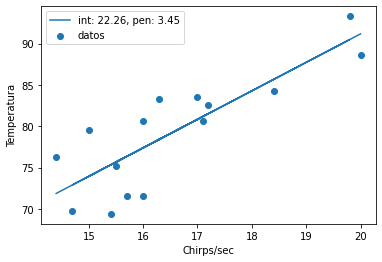

In [235]:
plotModelo(chirps,temp,r,123658)

## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [236]:
#Definimos los conjuntos a mano porque somos bien trabajadores
X=np.array([10.0,8.0,13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,5.0])
X4=np.array([8.0,8.0,8.0,8.0,8.0,8.0,8.0,19.0,8.0,8.0,8.0])
Y1=np.array([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])
Y2=np.array([9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74])
Y3=np.array([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])
Y4=np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

In [237]:
#Aplicamos la regresión lineal
r1= RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
r2= RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
r3= RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
r4= RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
r1.gradientDescent(X,Y1)
r2.gradientDescent(X,Y2)
r3.gradientDescent(X,Y3)
r4.gradientDescent(X4,Y4)

La función convergió con beta: [2.94731748 0.50531651] en la iteración 12292
La función convergió con beta: [2.9481381  0.50522536] en la iteración 12293
La función convergió con beta: [2.94967268 0.50495371] en la iteración 12294
La función convergió con beta: [2.94895873 0.50513421] en la iteración 12294


Podemos ver que la pendiente y la ordenada al origen de los cuatro grupos de datos son muy similares

Graficamos para ver lo que pasa

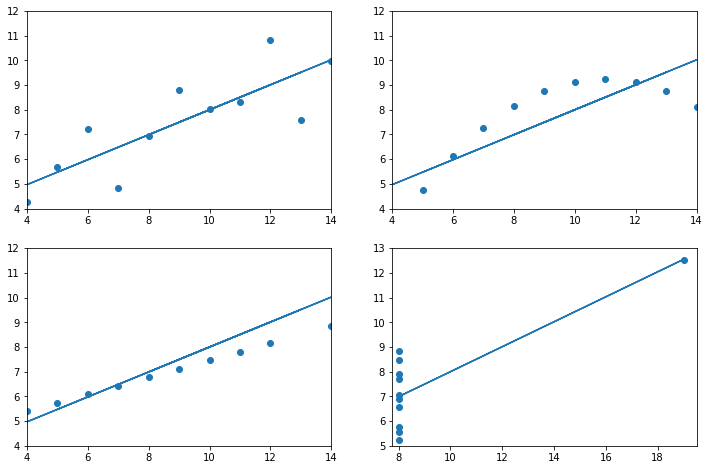

In [238]:
#Creamos un espacio para cuatro gráficas
fig, ax = plt.subplots(2,2, figsize=(12,8))
#Definimos la función de la recta con pendiente "m" y ordenada al origen "b"
modelo = lambda x,b,m: b + m*x
#Llamamos al historial de las distintas regresiones lineales para graficar la recta
_beta1 = r1.historia['beta'][12291]
_beta2 = r2.historia['beta'][12292]
_beta3 = r3.historia['beta'][12293]
_beta4 = r4.historia['beta'][12293]
#Graficamos los datos con scatter y graficamos las lineas con plot
#Ponemos un límite en los ejes para que se haga clara la similitud entre las rectas 
ax[0,0].scatter(X,Y1)
ax[0,0].plot(X, modelo(X, _beta1[0], _beta1[1]))
ax[0,0].set(xlim=(4,14),ylim=(4,12))
ax[0,1].scatter(X,Y2)
ax[0,1].plot(X, modelo(X, _beta2[0], _beta2[1]))
ax[0,1].set(xlim=(4,14),ylim=(4,12))
ax[1,0].scatter(X,Y3)
ax[1,0].plot(X, modelo(X, _beta3[0], _beta3[1]))
ax[1,0].set(xlim=(4,14),ylim=(4,12))
#En la 4 no seguimos el mismo límite porque es muy grande, pero la gráfica tiene la misma pendiente y ordenada al origen
ax[1,1].scatter(X4,Y4)
ax[1,1].plot(X4, modelo(X4, _beta4[0], _beta4[1]))
ax[1,1].set(xlim=(7.75,19.5),ylim=(5,13))

El cuarteto de Anscombe contiene pares ordenados tales que, al buscar una regresión lineal, arrojan la misma recta para estos puntos, a pesar de que entre ellos no parece haber una relación. Esto demuestra la importancia de graficar los datos antes de intentar analizarlos

## Problema 5

Use el archivo `radioactive_decay.dat`

In [5]:
%cat dat a/radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

In [239]:
datos=np.loadtxt('data/radioactive_decay.txt')
time=datos.transpose()[0]
remaining=datos.transpose()[1]

Text(0, 0.5, 'Radioactividad')

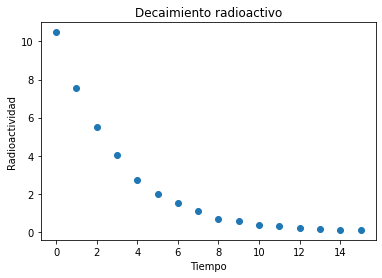

In [240]:
plt.scatter(time,remaining)
plt.title("Decaimiento radioactivo")
plt.xlabel("Tiempo")
plt.ylabel("Radioactividad")

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

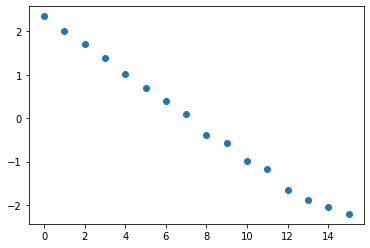

In [241]:
#Intentaremos linealizar los datos con la función de logaritmo natural
logr=np.array([math.log(i) for i in remaining])
plt.scatter(time,logr)

In [242]:
#Juntamos el array de tiempo con el transformado y lo guardamos
datos_decay=np.array([time,logr])
np.savetxt("datos_decay",datos_decay)

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [243]:
datos=np.loadtxt("datos_decay")
tiempo=datos[0]
transformados=datos[1]

In [244]:
#Aplicamos la regresión lineal para saber en cuantas iteraciones se alcanzó el resultado buscado
R=RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
R.gradientDescent(tiempo, transformados)

La función convergió con beta: [ 2.27548901 -0.31459673] en la iteración 5755


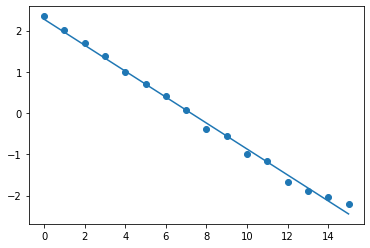

In [245]:
#Graficamos los datos y la aproximación lineal
_beta=R.historia['beta'][5754]
plt.scatter(tiempo,transformados)
plt.plot(tiempo, modelo(tiempo, _beta[0], _beta[1]))

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

Para los datos transformados, tenemos $\beta_0$ = 2.27 y $\beta_1$ = -0.314

In [246]:
#Aplicamos la regresión a los datos sin transformar
R1=RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
R1.gradientDescent(time,remaining)

La función convergió con beta: [ 6.43577297 -0.54728535] en la iteración 7016


Esto indica que para los datos sin transformar tenemos $\beta_0$ = 6.43 y $\beta_1$ = -0.54

Cuando intentamos linealizar los datos, obtuvimos una linea completamente nueva